# PSU STAT 501
https://newonlinecourses.science.psu.edu/stat501/node/358/


## Autocorrelation

![](http://slideplayer.com/slide/9416552/28/images/44/Autocorrelation+Autocorrelation+is+correlation+of+the+errors+(residuals)+over+time.+Here,+residuals+suggest+a+cyclic+pattern,+not+random..jpg)


In [1]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Autocorrelation with Google Stock

In [3]:
stock = pd.read_csv("data/google_stock.txt", sep='\t')
stock.head()

,date,price
0,2/7/2005,196.03
1,2/8/2005,198.64
2,2/9/2005,191.58
3,2/10/2005,187.98
4,2/11/2005,187.40


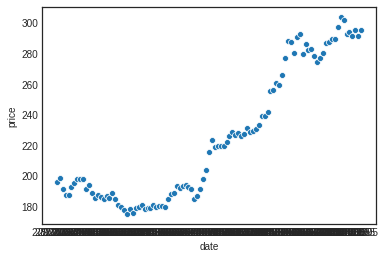

In [5]:
sns.scatterplot(x=stock.date, y=stock.price)

The consecutive values appear to follow one another fairly closely, suggesting an autogregression model could be appropriate. 

__Partial autocorrelation__
Next we will plit the __Partial Autocorrelation__ will will provide us insitght into the order the model might be in. 

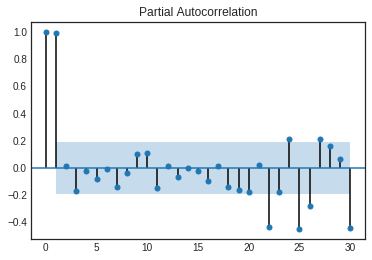

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(stock.price, lags=30);

we see thtere is a __significant spike__ at `lag of 1` and much lower spikes for the subsequent lags. Thus an `AR(1)` model would likely be feasible for this data set. The _blue shadded region_  in the __Partial Autocorrelation__ tells us the area that is statistically, these __autoo-correlations are 0__. Is provide the approximate bounds that can be consutrcuted in determining __large values__ where the significance bounds are given by $\pm z_{1-\alpha/2}/\sqrt{n}$ And therefore, _values lyting outside of these bounds are _indicative of an autoregressive process.__

In other words, even thought we do hav eosme autocorrelation, there is reason to believe its not really correlated, or more specifically, its close enough to 0 that we cannot consider it in the model. 

__Lag-1 Price__

Next we will created a new column `price_lag1` variable to consider a scatterplot of price vers this lag1 variable. 

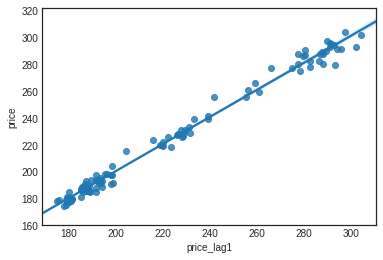

In [12]:
stock['price_lag1'] = stock.price.shift(1)
sns.regplot(x = stock.price_lag1, y=stock.price)

The regression plot above for `AR(1)` provide a linear pattern that follow this model:

    $\begin{equation*}     y_{t}=\beta_{0}+\beta_{1}y_{t-1}+\epsilon_{t}    \end{equation*}$

## Eearthquakes

In [13]:
quake = pd.read_csv("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/earthquakes/index.txt", sep='\t')
quake.head()

,Year,Quakes
0,1916,2
1,1917,5
2,1918,12
3,1919,8
4,1920,7


plot below give a time series plot fhr the number of worldwide earthquakes with magnitude greater htat 7 on ricter scale

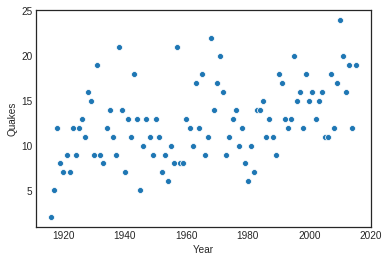

In [15]:
sns.scatterplot(x=quake.Year, y=quake.Quakes)

__partial autocorrelation function for earthquakes__

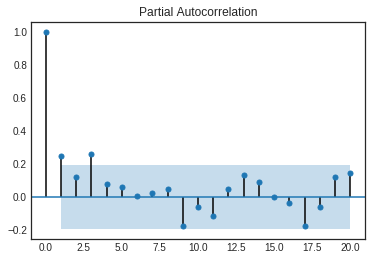

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(quake.Quakes, lags=20);

__Interpretation:__ the PACF (partical autocorrelation funciton) can be interpreted to mean that a third-order autoregression may be warnted sine there are notable partial autocorrelations for lages 1 and 3.

__MLR__
Therefore, enxt we will do a Multiple Linear Regression with the number of quakes as the response variable witht eh follwing lags in the modeol:

        $Quakes = \beta_lag1Quake + \beta_lag2Quake + \beta_lag3Quake$
   
Below is the OLS results:

In [23]:
quake['lag1_quake'] = quake.Quakes.shift(1)
quake['lag2_quake'] = quake.Quakes.shift(2)
quake['lag3_quake'] = quake.Quakes.shift(3)

In [26]:
quake_model = smf.ols(formula='Quakes~ lag1_quake + lag2_quake +lag3_quake', data = quake).fit()

print(quake_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Quakes   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.997
Date:                Thu, 30 May 2019   Prob (F-statistic):            0.00294
Time:                        22:41:51   Log-Likelihood:                -266.37
No. Observations:                  97   AIC:                             540.7
Df Residuals:                      93   BIC:                             551.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4492      1.786      3.610      0.0

The results show that `lag3_quake`predictor is __significant__ at 0.05 level (and lag-1 predictor p-value is also relatively small). 